In [2]:
from skimage.io import imread,imshow, imsave
from skimage.color import rgb2gray,gray2rgb
from skimage import transform as transform
from scipy import signal as sig
import numpy as np
import cv2

/home/abdelrhmanmagdy/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


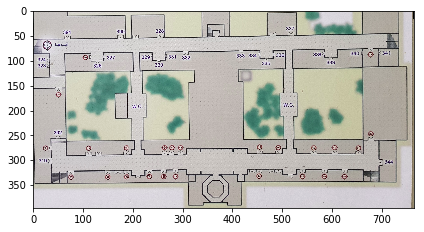

In [3]:
img = imread('../input/sm_map.png',as_gray = False)
imshow(img)

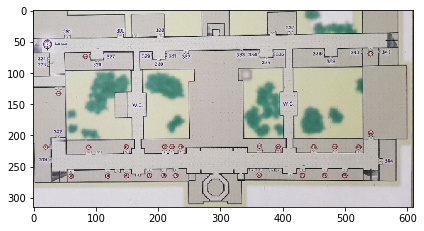

In [8]:
layer = cv2.resize(img.copy(), (610,315))
points = [
(293,243),
(411,239),
(540,239),
(169,242),
(43,242),
(167,152),
(165,55),
(103,56),
(39,58),
(202,58),
(373,52),
(409,148),
(409,52),
(477,52),
(542,49),
]
`#for x,y in points:
  #  cv2.circle(layer,(x,y), 2, color, thickness=5) 
imshow(layer)

test = layer.copy()

In [6]:
points = [(55,42),
(141,42),
(204,42),
(412,42),
(566,61),
(517,61),
(478,76),
(466,69),
(395,63),
(373,77),
(354,64),
(332,64),
(246,66),
(212,71),
(202,80),
(191,72),
(25,79),
(25,90),
(27,240),
(255,244),
(166,152),
(409,149),
(41,202)
]

In [4]:
from collections import deque, namedtuple


# we'll use infinity as a default distance to nodes.
inf = float('inf')
Edge = namedtuple('Edge', 'start, end, cost')


def make_edge(start, end, cost=1):
  return Edge(start, end, cost)


class Graph:
    def __init__(self, edges):
        # let's check that the data is right
        wrong_edges = [i for i in edges if len(i) not in [2, 3]]
        if wrong_edges:
            raise ValueError('Wrong edges data: {}'.format(wrong_edges))

        self.edges = [make_edge(*edge) for edge in edges]

    @property
    def vertices(self):
        return set(
            sum(
                ([edge.start, edge.end] for edge in self.edges), []
            )
        )

    def get_node_pairs(self, n1, n2, both_ends=True):
        if both_ends:
            node_pairs = [[n1, n2], [n2, n1]]
        else:
            node_pairs = [[n1, n2]]
        return node_pairs

    def remove_edge(self, n1, n2, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        edges = self.edges[:]
        for edge in edges:
            if [edge.start, edge.end] in node_pairs:
                self.edges.remove(edge)

    def add_edge(self, n1, n2, cost=1, both_ends=True):
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        for edge in self.edges:
            if [edge.start, edge.end] in node_pairs:
                return ValueError('Edge {} {} already exists'.format(n1, n2))

        self.edges.append(Edge(start=n1, end=n2, cost=cost))
        if both_ends:
            self.edges.append(Edge(start=n2, end=n1, cost=cost))

    @property
    def neighbours(self):
        neighbours = {vertex: set() for vertex in self.vertices}
        for edge in self.edges:
            neighbours[edge.start].add((edge.end, edge.cost))

        return neighbours

    def dijkstra(self, source, dest):
        assert source in self.vertices, 'Such source node doesn\'t exist'
        distances = {vertex: inf for vertex in self.vertices}
        previous_vertices = {
            vertex: None for vertex in self.vertices
        }
        distances[source] = 0
        vertices = self.vertices.copy()

        while vertices:
            current_vertex = min(
                vertices, key=lambda vertex: distances[vertex])
            vertices.remove(current_vertex)
            if distances[current_vertex] == inf:
                break
            for neighbour, cost in self.neighbours[current_vertex]:
                alternative_route = distances[current_vertex] + cost
                if alternative_route < distances[neighbour]:
                    distances[neighbour] = alternative_route
                    previous_vertices[neighbour] = current_vertex

        path, current_vertex = deque(), dest
        while previous_vertices[current_vertex] is not None:
            path.appendleft(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        if path:
            path.appendleft(current_vertex)
        return path


In [14]:
graph = Graph(edges)

out = graph.dijkstra(points[14],points[33])
out

deque([(542, 49),
       (477, 52),
       (409, 52),
       (373, 52),
       (202, 58),
       (165, 55),
       (166, 152),
       (169, 242),
       (43, 242),
       (27, 240)])

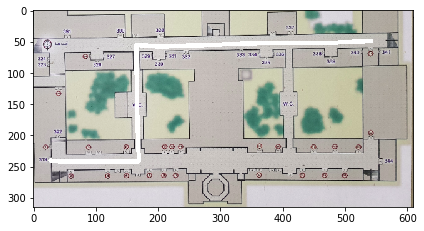

In [15]:
layer = cv2.resize(img.copy(), (610,315))
for i in range(0, len(out)-1):
    cv2.line(layer, out[i], out[i+1], (0,255,0), thickness=5, lineType=8, shift=0)
imshow(layer)

In [15]:
points = [
(293,243), 
(411,239),
(540,239),
(169,242),
(43,242),
(167,152),
(165,55),
(103,56),
(39,58),
(202,58),
(373,52),
(409,148),
(409,52),
(477,52),
(542,49),
(55,42),
(141,42),
(204,42),
(412,42),
(566,61),
(517,61),
(478,76),
(466,69),
(395,63),
(373,77),
(354,64),
(332,64),
(246,66),
(212,71),
(202,80),
(191,72),
(25,79),
(25,90),
(27,240),
(255,244),
(166,152),
(409,149),
(41,202)
]
edges =[
(points[1],points[2],1),
(points[1],points[36],1),
(points[1],points[0],1),
(points[0],points[34],1),
(points[34],points[3],1),
(points[3],points[4],1),
(points[3],points[35],1),
(points[4],points[33],1),
(points[4],points[37],1),
(points[35],points[6],1),
(points[6],points[16],1),
(points[6],points[17],1),
(points[6],points[7],1),
(points[6],points[9],1),
(points[7],points[15],1),
(points[7],points[8],1),
(points[8],points[31],1),
(points[8],points[32],1),
(points[8],points[15],1),
(points[9],points[17],1),
(points[9],points[30],1),
(points[9],points[28],1),
(points[9],points[29],1),
(points[9],points[27],1),
(points[10],points[9],1),
(points[10],points[26],1),
(points[10],points[25],1),
(points[10],points[24],1),
(points[10],points[23],1),
(points[10],points[12],1),
(points[10],points[18],1),
(points[36],points[12],1),
(points[12],points[13],1),
(points[13],points[22],1),
(points[13],points[21],1),
(points[13],points[20],1),
(points[13],points[14],1),
(points[14],points[20],1),
(points[14],points[19],1),
(points[2],points[1],1),
(points[36],points[1],1),
(points[0],points[1],1),
(points[34],points[0],1),
(points[3],points[34],1),
(points[4],points[3],1),
(points[35],points[3],1),
(points[33],points[4],1),
(points[37],points[4],1),
(points[6],points[35],1),
(points[16],points[6],1),
(points[17],points[6],1),
(points[7],points[6],1),
(points[9],points[6],1),
(points[15],points[7],1),
(points[8],points[7],1),
(points[31],points[8],1),
(points[32],points[8],1),
(points[15],points[8],1),
(points[17],points[9],1),
(points[30],points[9],1),
(points[28],points[9],1),
(points[29],points[9],1),
(points[27],points[9],1),
(points[9],points[10],1),
(points[26],points[10],1),
(points[25],points[10],1),
(points[24],points[10],1),
(points[23],points[10],1),
(points[12],points[10],1),
(points[18],points[10],1),
(points[12],points[36],1),
(points[13],points[12],1),
(points[22],points[13],1),
(points[21],points[13],1),
(points[20],points[13],1),
(points[14],points[13],1),
(points[20],points[14],1),
(points[19],points[14],1),
]

In [17]:
halls = {'344':(points[2]),'319':(points[4]),'IEEE':(points[0]),'WC':(points[11]),'323':(points[5]),'341':(points[14])}
halls['341']

(542, 49)

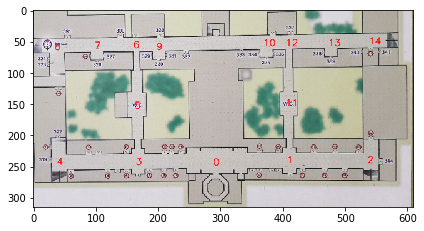

In [9]:
test = layer.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(points)):
    cv2.putText(test,str(i),(points[i][0]-5,points[i][1]+5), font, .5,(255,0,0,255),1,cv2.LINE_AA) 
imshow(test)
imsave('hohe.png',test)

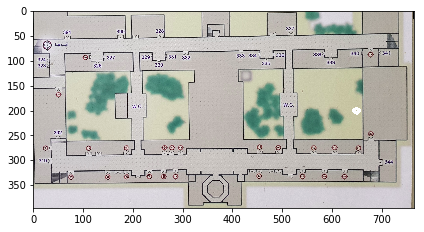

In [11]:
for i in range(0, len(out)-1):
#     print(out[i],out[i-1])
    cv2.line(layer, out[i], out[i-1], (0,255,0), thickness=5, lineType=8, shift=0)
imshow(layer)

In [38]:
len(points)

38

In [49]:
out

deque([])